In [851]:
import numpy as np
import activation_functions as act_funs
import matplotlib.pyplot as plt

In [852]:

class Single_Layer_Perceptron():
    
    def __init__(self, X, T, bias = True):
        self.N = X.shape[1]
        self.bias = bias
        self.output_dim = T.shape[0]
        if bias:
            self.D = X.shape[0] + 1
            self.X = self.X_add_bias(X)
        else:
            self.D = X.shape[0]
            self.X = X
        self.T = T
        self.eta = 0.001
        self.errors = []
        self.epochs = 1
        self.W_init = self.init_W() # Store initial W
        self.W_train = self.W_init
        self.converge_epoch = np.inf
    
    def X_add_bias(self, X):
        X_bias = np.ones([self.D, self.N])
        X_bias[:-1,:] = np.copy(X)
        return X_bias
    
    def init_W(self):
        return np.random.rand(self.output_dim, self.D)
    
    def indicator(self, W, x):
        if np.matmul(W, x) >= 0:
            return 1
        else:
            return 0
    
    def seq_learn(self):
        se = 0
        for i in range(self.N):
            delta_W = 0
            x = self.X[:,i].reshape(self.D, 1)
            y = self.indicator(self.W_train, x)
            t = self.T[:,i]
            if t == 0 and y == 1:
                delta_W = -self.eta*x.T
            if t == 1 and y == 0:
                delta_W = self.eta*x.T
            self.W_train = np.add(self.W_train, delta_W)
            se += (y-t)**2
        mse = np.mean(se)
        self.errors.append(mse)
    
    def batch_learn(self):
        se = 0
        delta_W = 0
        for i in range(self.N):
            x = self.X[:,i].reshape(self.D, 1)
            y = self.indicator(self.W_train, x)
            t = self.T[:,i]
            if t == 0 and y == 1:
                delta_W += -self.eta*x.T
            if t == 1 and y == 0:
                delta_W += self.eta*x.T
            se += (y-t)**2
        mse = np.mean(se)
        self.W_train = np.add(self.W_train, delta_W)
        self.errors.append(mse)
    
    def train(self, learn_type = 'batch'):
        for e in range(self.epochs):
            if learn_type == 'batch':
                self.batch_learn()
            elif learn_type == 'seq':
                self.seq_learn()
            else:
                print("Unknown learning type")
    
    def plot_errors(self):
        plt.plot(self.errors)
        print("Obtained error", self.errors[-1:][0])

In [853]:
def w_line_vec(W, x_start, x_end, bias):
    w_line = np.zeros(2)
    k = W[:,1][0]/W[:,0][0]
    if bias:
        m = W[:,2]
    else:
        m = 0
    w_line[0] = k*x_start + m
    w_line[1] = k*x_end + m
    
    return w_line

def plot_W(W, bias):
    if bias:
        bias_term = W[:, -1:][0]
        W_term = W[:, :-1][0]
    else:
        bias_term = 0
        W_term = W
    x_val = np.array([0, 1])
    k = (W_term[1] - bias_term)/W_term[0]
    y_val = x_val*k + bias_term
    x_small = ([0, W_term[0]])
    y_small = ([bias_term, W_term[1]])
    plt.plot(x_val, y_val)
    plt.plot(x_small, y_small)

def plot_norm_vec(W, bias):
    if bias:
        bias_term = W[:, -1:][0]
        W_term = W[:, :-1][0]
    else:
        bias_term = 0
        W_term = W
    W_term_unbiased = np.copy(W_term)
    W_term_unbiased[1] = W_term_unbiased[1] - bias_term
    unbiased_normal = np.zeros(W_term_unbiased.shape)
    unbiased_normal[0] = 1
    unbiased_normal[1] = -W_term_unbiased[0]/W_term_unbiased[1]
    normal = np.copy(unbiased_normal)
    normal[1] = unbiased_normal[1] + bias_term
    print("Unbiased Scalar product", 
          np.matmul(W_term_unbiased.T, unbiased_normal))
    x_val = np.array([0, 1])
    k = unbiased_normal[1]/unbiased_normal[0]
    y_val = x_val*k + bias_term
    plt.plot(x_val, y_val + bias_term)
    return normal

def plot_decision_boundary(classA, classB, W, bias):
    plt.plot(classA[:,0], classA[:,1], 'bo', color = 'b')
    plt.plot(classB[:,0], classB[:,1], 'bo', color = 'r')
    #plt.plot(w_line_vec(W, 0, 1, bias))
    #plt.plot(norm_vec(w_line_vec(W, 0, 1, bias)))
    #plt.plot((0, W[:,0]), (W[:,2], W[:,1]))
    plot_W(W, bias)
    plot_norm_vec(W, bias)

def plot_db_scatter(W):
    x_val = []

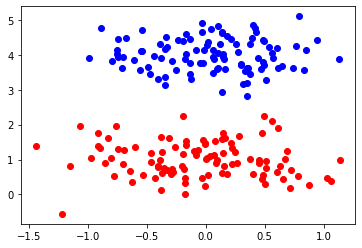

In [854]:
n = 100
mA = np.array([0, 4])
mB = np.array([0, 1])
sigmaA = 0.5
sigmaB = 0.5
classA = np.zeros([n,2])
classB = np.zeros([n,2])
classA[:,0] = np.random.normal(mA[0], sigmaA, n)
classA[:,1] = np.random.normal(mA[1], sigmaA, n)
classB[:,0] = np.random.normal(mB[0], sigmaB, n)
classB[:,1] = np.random.normal(mB[1], sigmaB, n)

plt.plot(classA[:,0], classA[:,1], 'bo', color = 'b')
plt.plot(classB[:,0], classB[:,1], 'bo', color = 'r')

In [915]:
data = np.concatenate((classA, classB), axis=0)
labels = np.array([1]*n + [0]*n)

data_labels = np.concatenate((data, labels.reshape(n*2,1)), axis=1)
np.random.shuffle(data_labels)

X = data_labels[:,:2].T
T = data_labels[:,2].reshape(n*2, 1).T

### Perceptron learning with bias

In [1123]:
perceptron = Single_Layer_Perceptron(X, T)

Obtained error 0.0
W trained: [[ 0.09641075  0.09289913 -0.25787975]]
Initial W [[0.59172969 0.54626424 0.91212025]]


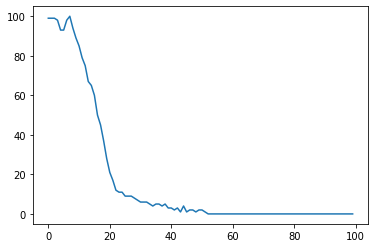

In [1124]:
perceptron.epochs = 100
perceptron.train('seq')
perceptron.plot_errors()
print("W trained:", perceptron.W_train)
print("Initial W", perceptron.W_init)

Unbiased Scalar product 1.3877787807814457e-17


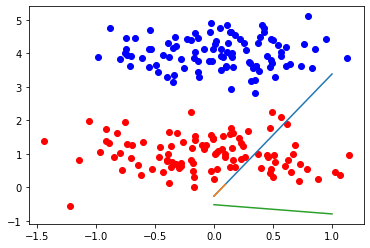

In [1125]:
plot_decision_boundary(classA, classB, 
                       perceptron.W_train, perceptron.bias)

In [1133]:
def plot_boundary(data, labels, weights):
    label_color_map = {
        1: 'b',
        0: 'r',
        -1: 'r'
    }
    label_colors = list(map(lambda x: label_color_map.get(x), labels))

    boundary_func = lambda x: -(weights[0]*x + weights[2])/weights[1]
    boundary_x = [-1, 0, 1]
    boundary_y = list(map(boundary_func, boundary_x))

    n_grid = 100
    classify = np.vectorize(lambda x, y: np.sign(weights[0]*x + weights[1]*y + weights[2]))
    grid_x, grid_y = np.meshgrid(np.linspace(-2, 2, n_grid), np.linspace(-1, 6, n_grid))
    grid_class = classify(grid_x, grid_y).flatten()
    grid_colors = np.vectorize(lambda x: label_color_map.get(x))(grid_class)

    plt.scatter(grid_x, grid_y, c=grid_colors, alpha=0.03)
    plt.scatter(data[0, :], data[1, :], c=label_colors)
    plt.plot(boundary_x, boundary_y, c='black')
    plt.quiver(boundary_x[1], boundary_y[1], weights[0], weights[1], angles='xy', minlength=1)

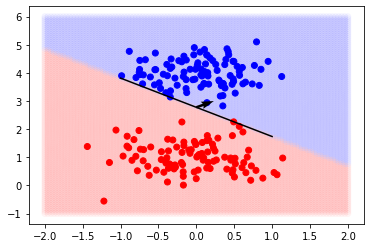

In [1134]:
plot_boundary(perceptron.X, perceptron.T[0].tolist(), perceptron.W_train[0].tolist())

Obtained error 0.0


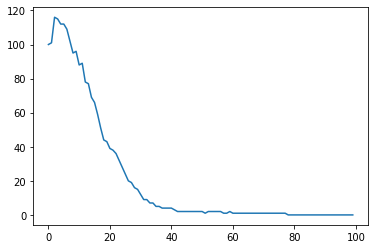

In [158]:
perceptron.W_train = perceptron.W_init
perceptron.errors = [] 
perceptron.train('batch')
perceptron.plot_errors()

In [1121]:
perceptron.W_train

array([[0.00135543, 0.00386881]])

In [192]:
perceptron.X[:,3].reshape(perceptron.D, 1)

array([[0.04897805],
       [5.04636591],
       [1.        ]])

### Perceptron learning without bias

In [1079]:
perceptron = Single_Layer_Perceptron(X, T, False)

Obtained error 96.0


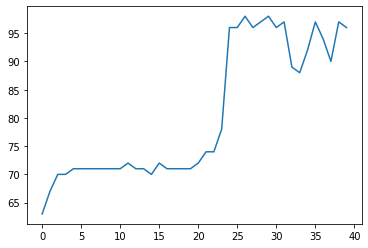

In [1119]:
perceptron.train('seq')
perceptron.plot_errors()

Obtained error 98.0


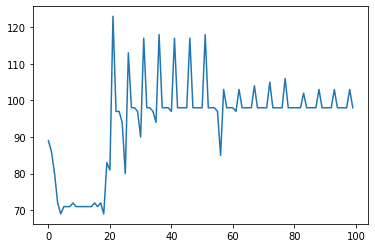

In [160]:
perceptron.W_train = perceptron.W_init
perceptron.errors = [] 
perceptron.train('batch')
perceptron.plot_errors()